In [1]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df_train_ali = next(pd.read_json('../../data/aliexpress/Aliexpress_Meta_Train.json', lines=True, chunksize=int(1e11)))
df_train_wish = next(pd.read_json('../../data/wish_products/Wish_Meta_Train.json', lines=True, chunksize=int(1e11)))
df_train_wish_truetag = next(pd.read_json('../../data/wish_products_truetag_tahoe/Wish_Truetag_Tahoe_Meta_Train.json', 
    lines=True, chunksize=1000000))
df_train_amazon = next(pd.read_json('../../data/amazon/All_Amazon_Meta_Train.json', lines=True, chunksize=int(1e11)))

In [10]:
df_test_mturk_wish = pd.read_json('../../data/wish_products/wish-mturk-labelled-09202022-clean.json', 
    lines=True)

In [11]:
df_train_ali['source'] = 'aliexpress'
df_train_wish['source'] = 'wish-aliexpress'
df_train_amazon['source'] = 'amazon'
df_train_wish_truetag['source'] = 'wish-truetag'
df_test_mturk_wish['source'] = 'wish-mturk'

df_train_ali['split'] = 'train'
df_train_wish['split'] = 'train'
df_train_amazon['split'] = 'train'
df_train_wish_truetag['split'] = 'train'
df_test_mturk_wish['split'] = 'test-gold'

In [12]:
df_all = pd.concat([ 
    df_test_mturk_wish,
    df_train_wish,
    df_train_ali,
    df_train_amazon,
    df_train_wish_truetag
])

In [13]:
df_all.drop_duplicates(subset=['title'], keep="first", inplace=True, ignore_index=True) # prioritized keep

In [14]:
len(df_all)

31848272

In [17]:
len(df_train_wish), len(df_train_ali), len(df_train_amazon), len(df_train_wish_truetag), len(df_test_mturk_wish)

(16603048, 12697746, 12794705, 1000000, 6401)

In [16]:
Counter(df_all[['source', 'split']].itertuples(index=False, name=None))

Counter({('wish-mturk', 'test-gold'): 6387,
         ('wish-aliexpress', 'train'): 16602911,
         ('aliexpress', 'train'): 1718963,
         ('amazon', 'train'): 12793074,
         ('wish-truetag', 'train'): 726937})

In [9]:
df_all['category_tuple'] = df_all['category'].apply(tuple)

<AxesSubplot: ylabel='Frequency'>

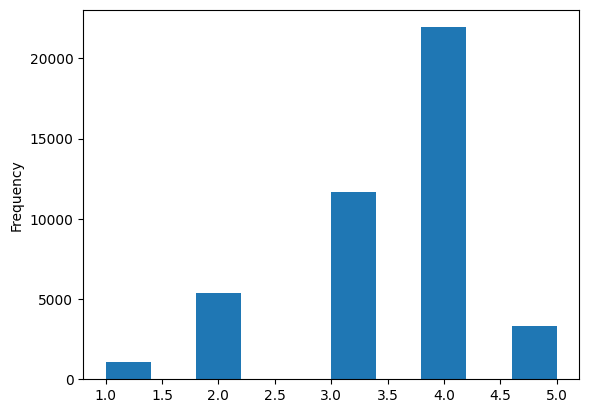

In [10]:
df_all['category_tuple'].apply(len).plot.hist()

<AxesSubplot: ylabel='Frequency'>

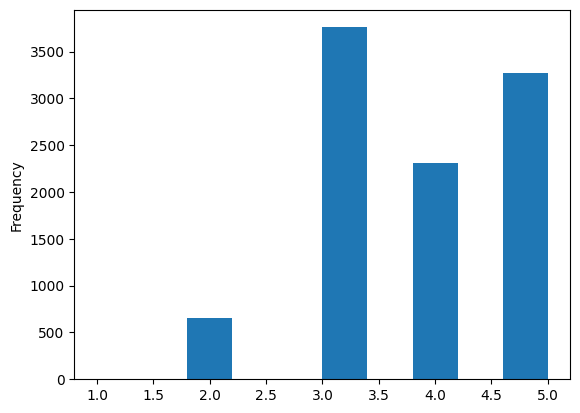

In [11]:
df_all[df_all.source == 'amazon']['category_tuple'].apply(len).plot.hist()

<AxesSubplot: ylabel='Frequency'>

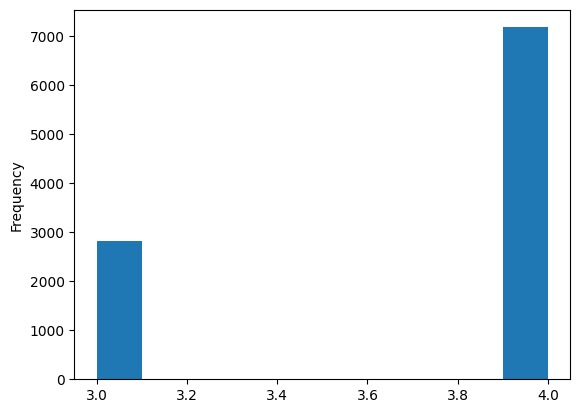

In [12]:
df_all[df_all.source == 'aliexpress']['category_tuple'].apply(len).plot.hist()

<AxesSubplot: ylabel='Frequency'>

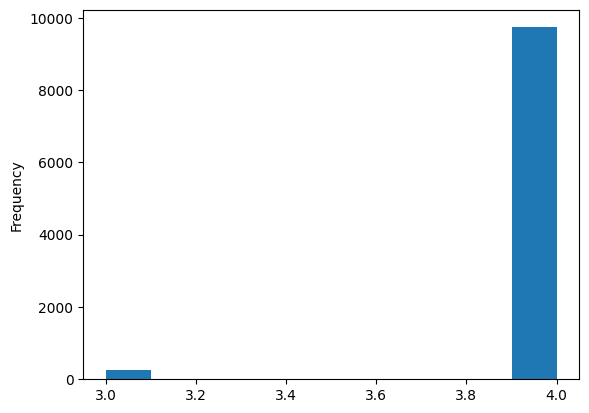

In [13]:
df_all[df_all.source == 'wish-aliexpress']['category_tuple'].apply(len).plot.hist()

<AxesSubplot: ylabel='Frequency'>

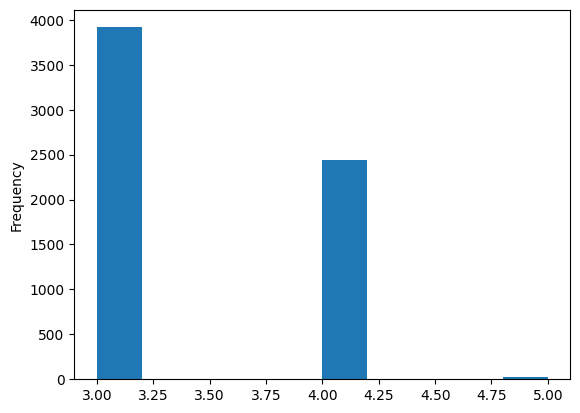

In [15]:
df_all[df_all.source == 'wish-mturk']['category_tuple'].apply(len).plot.hist()

In [16]:
def f(source, category_tuple):
    return tuple([source, *category_tuple])
df_all['source_category_tuple'] = df_all.apply(lambda x: f(x.source, x.category_tuple), axis=1)

In [17]:
tmp = Counter(df_all['source_category_tuple'])
len(tmp)

5564

In [19]:
tmp.most_common(3)

[(('wish-aliexpress',
   'home & garden',
   'pet products',
   'dog collars & leads',
   'leashes'),
  5009),
 (('aliexpress',
   'home & garden',
   'home decor',
   'ornaments',
   'decorative balls'),
  4271),
 (('wish-aliexpress',
   'automobiles & motorcycles',
   'motorcycle accessories & parts',
   'frames & fittings',
   'registration plate holder'),
  4156)]

In [20]:
tmp.most_common()[-3:]

[(('wish-truetag', 'household supplies', 'toilet paper'), 1),
 (('wish-truetag', 'watches', 'watch bands'), 1),
 (('wish-truetag', 'pants', 'bottoms', 'fashion', 'cargo pants'), 1)]